In [1]:
pip install catboost


[notice] A new release of pip available: 22.2.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install xgboost


[notice] A new release of pip available: 22.2.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install optuna

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
!pip install shap


[notice] A new release of pip available: 22.2.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

In [7]:
pd.set_option("display.max_columns", None) # displaying all the columns available in the dataset

df = pd.read_csv('data.csv',sep=";")

In [8]:
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,5,9,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,3,3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,9,9,124.8,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,5,3,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,9,9,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [9]:
#missing values
df.isnull().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

In [10]:
# Check for duplicates and print the number of duplicates
num_duplicates = df.duplicated().sum()
print(f"Number of duplicates: {num_duplicates}")

Number of duplicates: 0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [12]:
df['Target'].value_counts()

Graduate    2209
Dropout     1421
Enrolled     794
Name: Target, dtype: int64

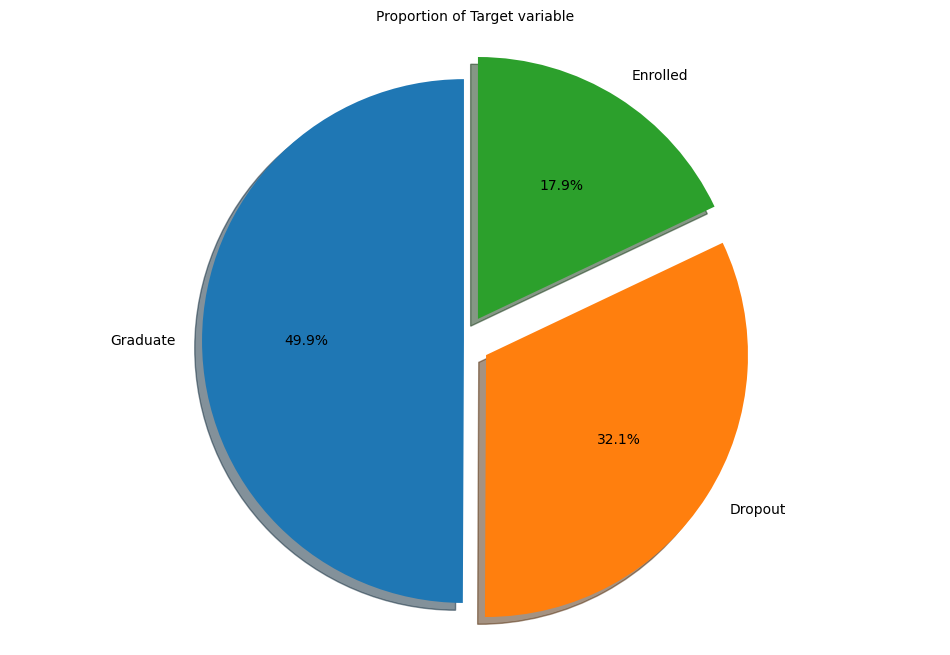

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
# Pie chart to display the amount (percentage) distribution of the Target Variable

labels = 'Graduate', 'Dropout', 'Enrolled'
sizes = [df.Target[df['Target']=='Graduate'].count(), df.Target[df['Target']=='Dropout'].count(), df.Target[df['Target']=='Enrolled'].count()]
explode = (0, 0.1, 0.1)
fig1, ax1 = plt.subplots(figsize=(12, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of Target variable", size = 10)
plt.show()

In [14]:
# Create separate dataframe for continous random variables.

df_num = df.select_dtypes(include=['float64'])
df_num

,Previous qualification (grade),Admission grade,Curricular units 1st sem (grade),Curricular units 2nd sem (grade),Unemployment rate,Inflation rate,GDP
0,122.0,127.3,0.000000,0.000000,10.8,1.4,1.74
1,160.0,142.5,14.000000,13.666667,13.9,-0.3,0.79
2,122.0,124.8,0.000000,0.000000,10.8,1.4,1.74
3,122.0,119.6,13.428571,12.400000,9.4,-0.8,-3.12
4,100.0,141.5,12.333333,13.000000,13.9,-0.3,0.79
...,...,...,...,...,...,...,...
4419,125.0,122.2,13.600000,12.666667,15.5,2.8,-4.06
4420,120.0,119.0,12.000000,11.000000,11.1,0.6,2.02
4421,154.0,149.5,14.912500,13.500000,13.9,-0.3,0.79
4422,180.0,153.8,13.800000,12.000000,9.4,-0.8,-3.12


C:\Users\maria\AppData\Local\Temp\ipykernel_36068\1319556284.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i], color = 'red')


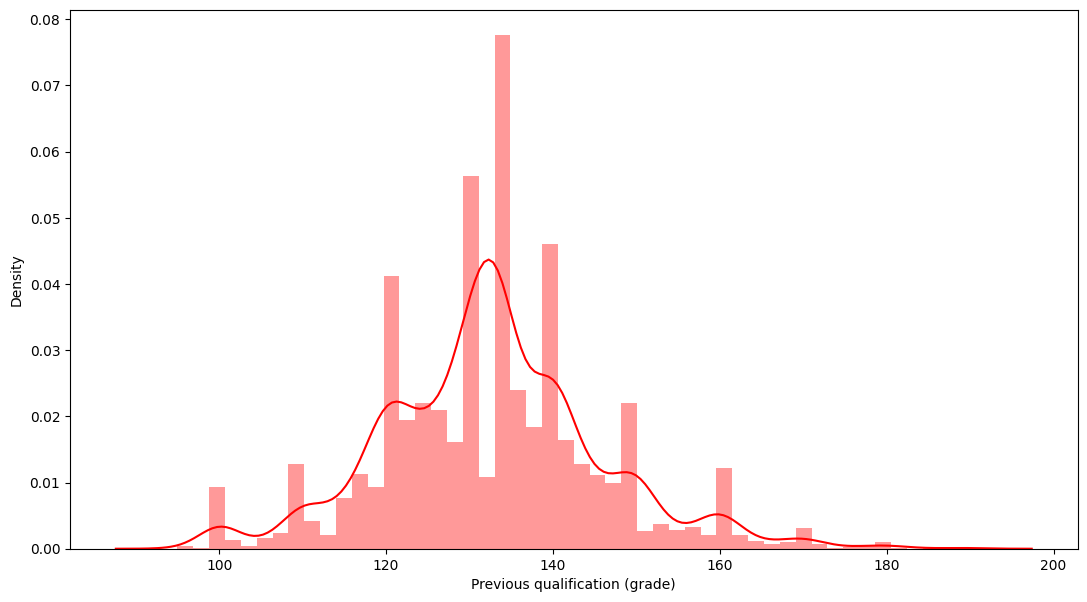

C:\Users\maria\AppData\Local\Temp\ipykernel_36068\1319556284.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i], color = 'red')


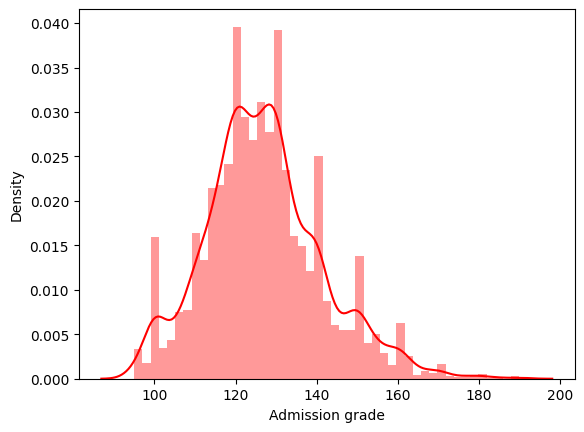

C:\Users\maria\AppData\Local\Temp\ipykernel_36068\1319556284.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i], color = 'red')


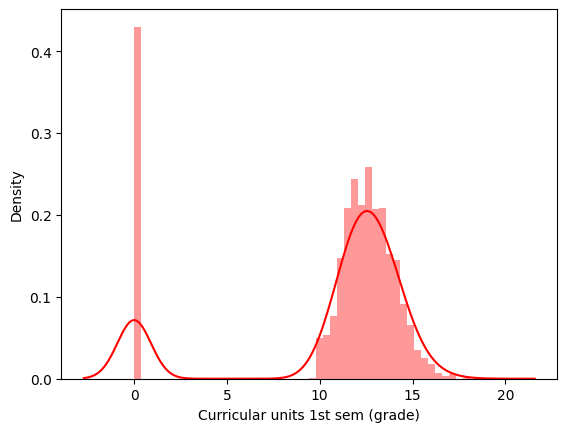

C:\Users\maria\AppData\Local\Temp\ipykernel_36068\1319556284.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i], color = 'red')


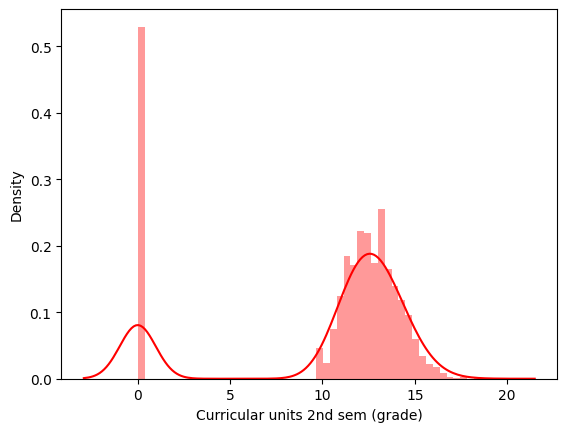

C:\Users\maria\AppData\Local\Temp\ipykernel_36068\1319556284.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i], color = 'red')


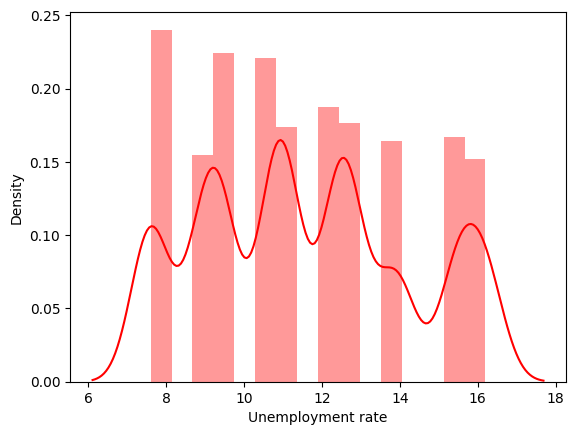

C:\Users\maria\AppData\Local\Temp\ipykernel_36068\1319556284.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i], color = 'red')


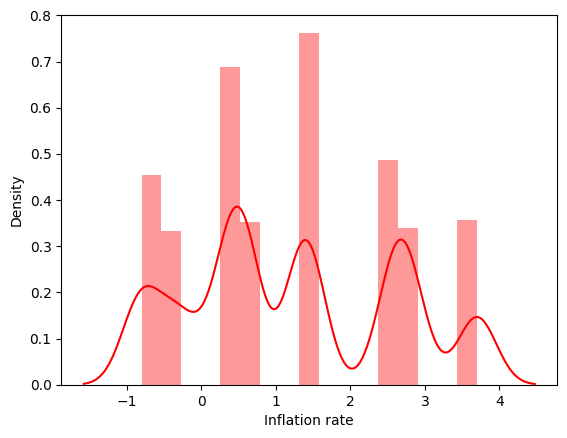

C:\Users\maria\AppData\Local\Temp\ipykernel_36068\1319556284.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i], color = 'red')


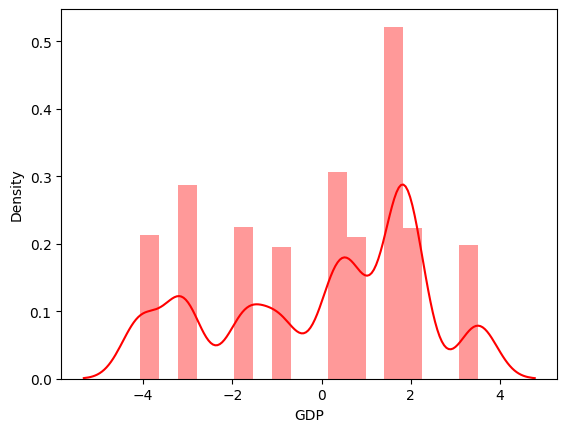

In [15]:
# Distribution Plot
plt.figure(figsize = (13, 7))

for i in df_num.columns:
    sns.distplot(df[i], color = 'red')
    plt.show()

In [16]:
status_mapping = {'Dropout': 0, 'Enrolled': 1, 'Graduate': 2}
df['Target'] = df['Target'].map(status_mapping)

In [17]:

import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier, Pool
import optuna
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['Target']), df['Target'], test_size=0.2, random_state=42)

In [18]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

In [19]:
NB = GaussianNB()

# fit the model
NB.fit(X_train, y_train)


GaussianNB()

In [20]:
# Making Prediction

y_pred_nb = NB.predict(X_test)


In [21]:
# Evaluation

print("Accuracy Score: ", accuracy_score(y_test, y_pred_nb))
print("F1-Score: ", f1_score(y_test, y_pred_nb, average= None))
print(classification_report(y_test, y_pred_nb))

Accuracy Score:  0.6994350282485876
F1-Score:  [0.7440273  0.31007752 0.77969762]
              precision    recall  f1-score   support

           0       0.81      0.69      0.74       316
           1       0.37      0.26      0.31       151
           2       0.71      0.86      0.78       418

    accuracy                           0.70       885
   macro avg       0.63      0.61      0.61       885
weighted avg       0.69      0.70      0.69       885



In [22]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [23]:
#Define the objective function for Optuna
def objective(trial):
    # Define hyperparameters to search
    params = {
        'iterations': trial.suggest_int('iterations', 100, 1000),
        'depth': trial.suggest_int('depth', 4, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'random_strength': trial.suggest_float('random_strength', 0.1, 1.0),
        'bagging_temperature': trial.suggest_float('bagging_temperature', 0.0, 1.0),
        'border_count': trial.suggest_int('border_count', 5, 255),
        'thread_count': -1,  # You can adjust this based on your machine's capabilities
        'eval_metric': 'MultiClass',
        'loss_function': 'MultiClass'
    }
    print(params)
    # Create a CatBoost model
    model = CatBoostClassifier(**params, task_type='CPU', verbose=False)

    # Fit the model on training data

    model.fit(X_train, y_train, eval_set=(X_val, y_val))
    accuracy = model.score(X_val, y_val)

    return 1 - accuracy  # Optimize for accuracy, so use 1 - accuracy as the objective

    # Evaluate the model on the validation set


#Set up Optuna study
#study = optuna.create_study(direction='minimize')
#study.optimize(objective, n_trials=50)  # You can adjust the number of trials

#Print the best hyperparameters found by Optuna
#best_params = study.best_params
best_params = {
    'iterations': 917,
    'depth': 8,
    'learning_rate': 0.05790503997454657,
    'random_strength': 0.14250336170299163,
    'bagging_temperature': 0.27472005167207914,
    'border_count': 139,
    'thread_count': -1,  # You can adjust this based on your machine's capabilities
    'eval_metric': 'MultiClass',
    'loss_function': 'MultiClass'
}

print("Best Hyperparameters:", best_params)

#Train the final model with the best hyperparameters
final_model = CatBoostClassifier(**best_params, task_type='CPU', verbose=True)
final_model.fit(X_train, y_train)
#Best Hyperparameters: {'iterations': 917, 'depth': 8, 'learning_rate': 0.05790503997454657, 'random_strength': 0.14250336170299163, 'bagging_temperature': 0.27472005167207914, 'border_count': 139}

#Optionally, you can evaluate the final model on the test set
test_accuracy = final_model.score(X_test, y_test)
print("Final Model Test Accuracy:", test_accuracy)

Best Hyperparameters: {'iterations': 917, 'depth': 8, 'learning_rate': 0.05790503997454657, 'random_strength': 0.14250336170299163, 'bagging_temperature': 0.27472005167207914, 'border_count': 139, 'thread_count': -1, 'eval_metric': 'MultiClass', 'loss_function': 'MultiClass'}
0:	learn: 1.0486911	total: 197ms	remaining: 3m
1:	learn: 1.0052164	total: 231ms	remaining: 1m 45s
2:	learn: 0.9680396	total: 267ms	remaining: 1m 21s
3:	learn: 0.9352343	total: 295ms	remaining: 1m 7s
4:	learn: 0.9054421	total: 323ms	remaining: 58.9s
5:	learn: 0.8794547	total: 350ms	remaining: 53.2s
6:	learn: 0.8555981	total: 376ms	remaining: 48.8s
7:	learn: 0.8323385	total: 402ms	remaining: 45.7s
8:	learn: 0.8091465	total: 431ms	remaining: 43.5s
9:	learn: 0.7901093	total: 462ms	remaining: 41.9s
10:	learn: 0.7715526	total: 492ms	remaining: 40.5s
11:	learn: 0.7548636	total: 518ms	remaining: 39s
12:	learn: 0.7405541	total: 545ms	remaining: 37.9s
13:	learn: 0.7256915	total: 570ms	remaining: 36.8s
14:	learn: 0.7134266	t

In [24]:
from sklearn.metrics import accuracy_score
from sklearn.inspection import permutation_importance

#Assuming you have already trained the final_model
#Use the test set for evaluation
y_pred = final_model.predict(X_test)

#Calculate the accuracy on the test set
baseline_accuracy = accuracy_score(y_test, y_pred)

#Perform permutation importance
perm_importance = permutation_importance(final_model, X_test, y_test, n_repeats=30, random_state=42)

#Get feature importances
feature_importances = perm_importance.importances_mean
# Get indices that would sort the feature importances in descending order
sorted_indices = np.argsort(feature_importances)[::-1]

# Print feature importances sorted by importance
for idx in sorted_indices:
    feature = X_train.columns[idx]
    importance = feature_importances[idx]
    print(f"{feature}: {importance:.4f} (baseline accuracy change)")


Curricular units 2nd sem (approved): 0.1876 (baseline accuracy change)
Curricular units 1st sem (approved): 0.0606 (baseline accuracy change)
Tuition fees up to date: 0.0346 (baseline accuracy change)
Course: 0.0118 (baseline accuracy change)
Curricular units 2nd sem (enrolled): 0.0088 (baseline accuracy change)
Curricular units 2nd sem (evaluations): 0.0063 (baseline accuracy change)
Debtor: 0.0060 (baseline accuracy change)
Curricular units 2nd sem (grade): 0.0053 (baseline accuracy change)
Previous qualification (grade): 0.0049 (baseline accuracy change)
Curricular units 1st sem (enrolled): 0.0049 (baseline accuracy change)
Age at enrollment: 0.0039 (baseline accuracy change)
Curricular units 1st sem (evaluations): 0.0029 (baseline accuracy change)
Father's qualification: 0.0022 (baseline accuracy change)
Curricular units 1st sem (grade): 0.0020 (baseline accuracy change)
Previous qualification: 0.0019 (baseline accuracy change)
Father's occupation: 0.0014 (baseline accuracy change)

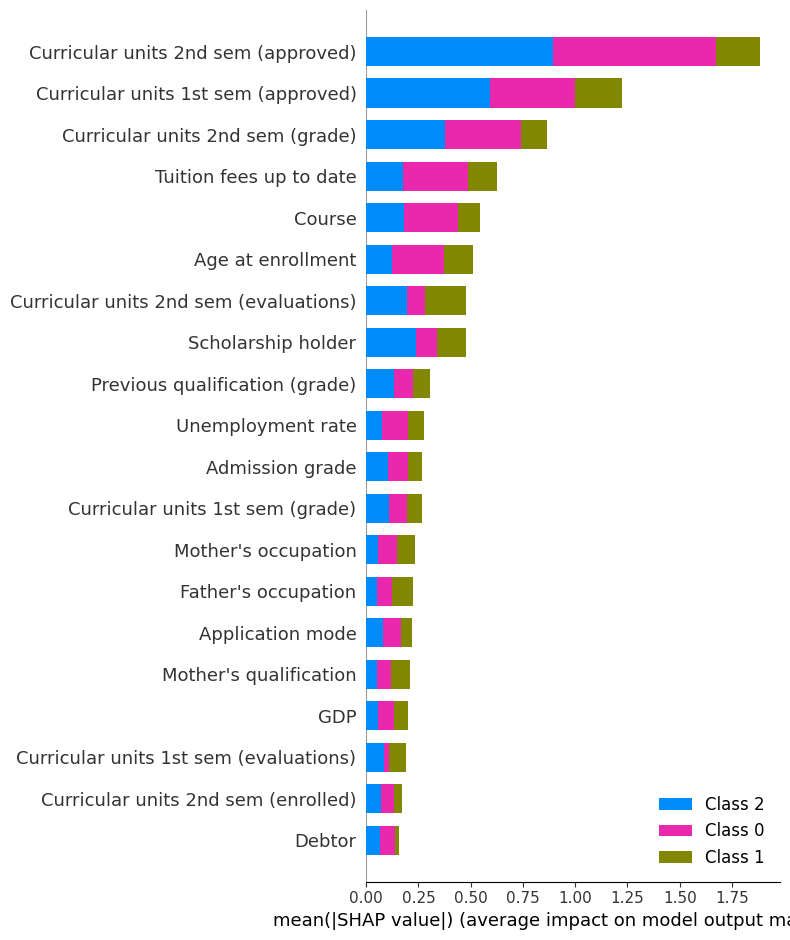

In [28]:
import shap

#Assuming you have already trained the final_model
#Use the test set for evaluation
y_pred_proba = final_model.predict_proba(X_test)

#Initialize a SHAP explainer
explainer = shap.TreeExplainer(final_model)

#Calculate SHAP values for a set of samples (e.g., first 100 samples)
shap_values = explainer.shap_values(X_test)

#Summarize the effects of all the features on the output
# shap.summary_plot(shap_values, X_test, feature_names=X_test.columns, plot_type="bar")

#Visualize individual predictions
shap.summary_plot(shap_values, X_test, feature_names=X_test.columns)

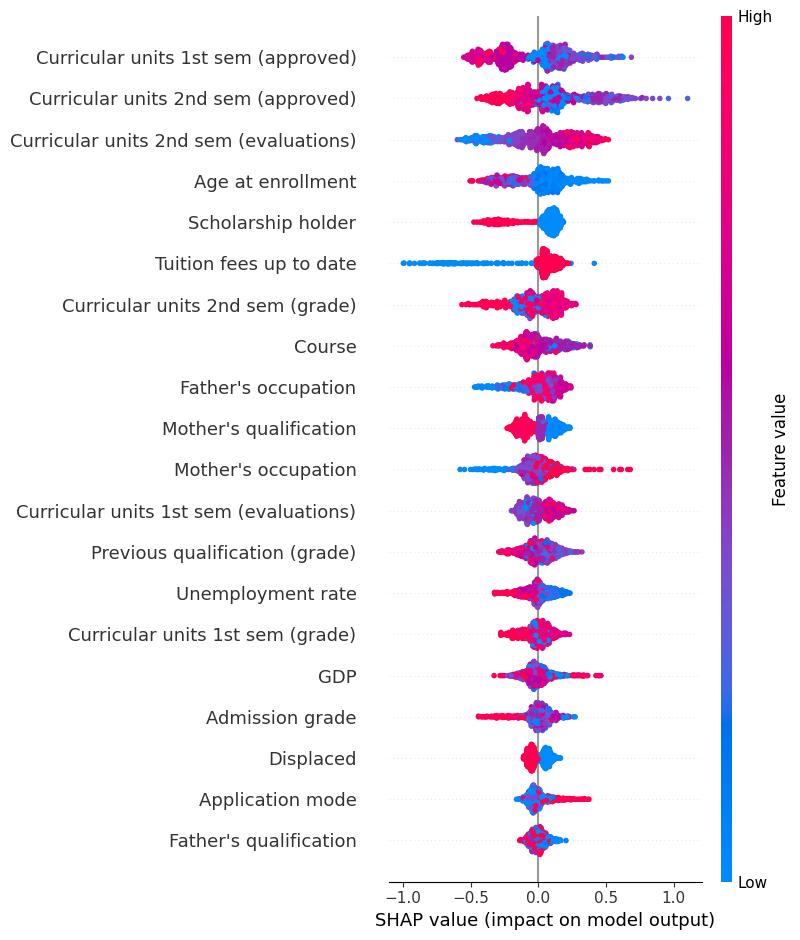

In [29]:
# Make plot. Index of [1] is explained in text below.
shap.summary_plot(shap_values[1], X_test)

Dropout


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


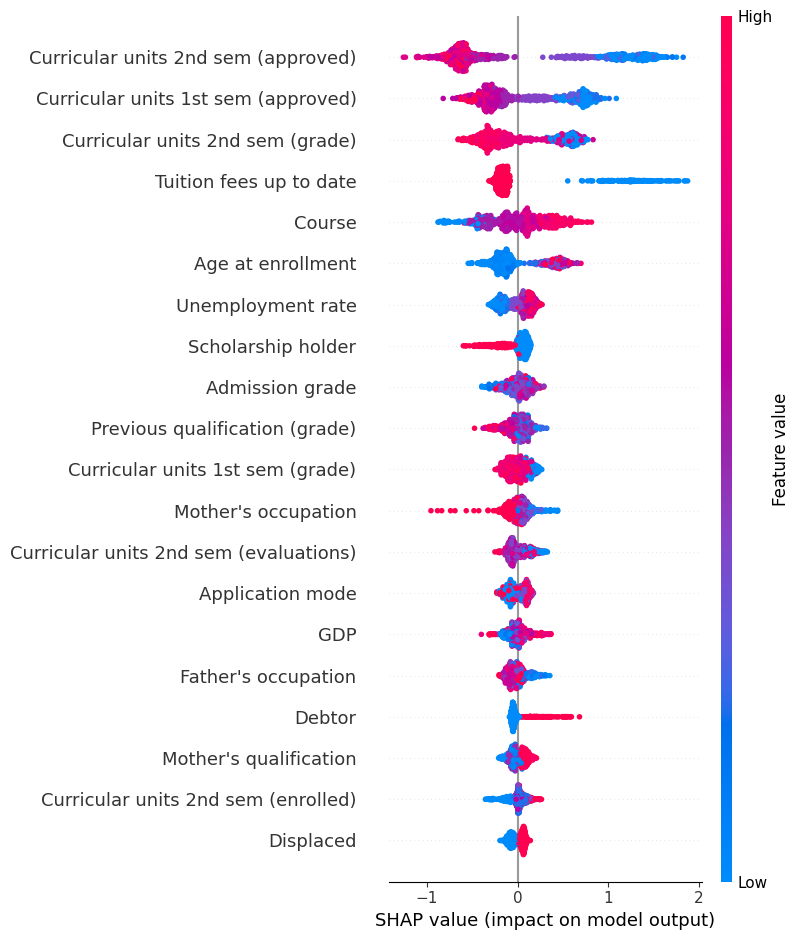

Enrolled


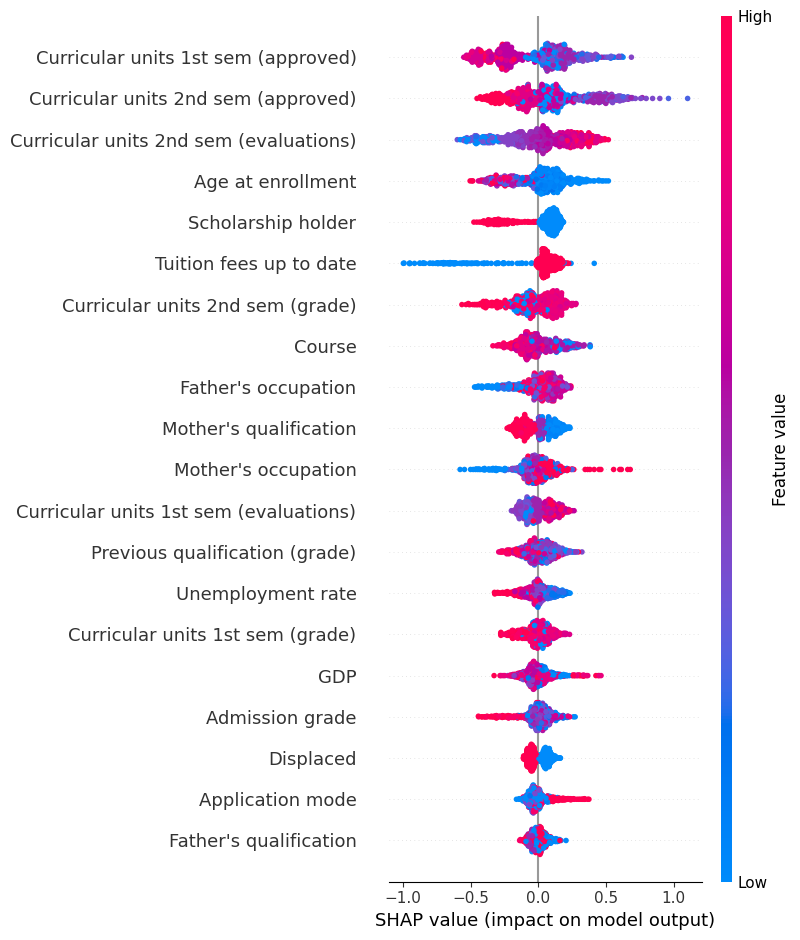

Graduate


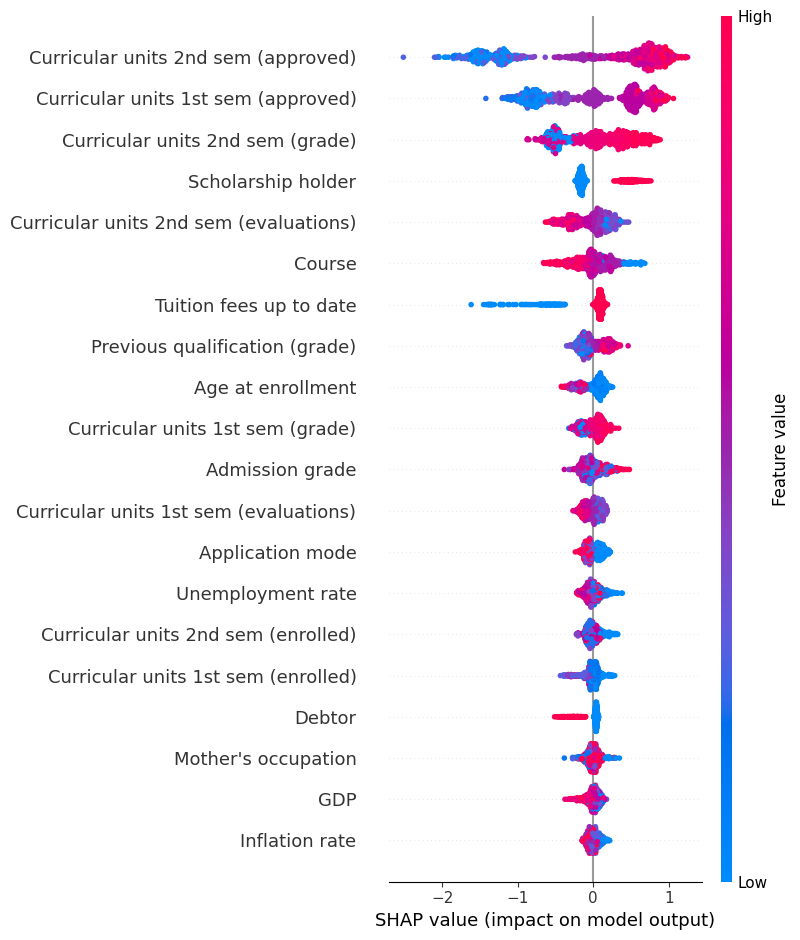

In [32]:
my_encoding={0:'Dropout',1:'Enrolled',2:"Graduate"}
for class_label in final_model.classes_:
    print(my_encoding[class_label])
    shap.summary_plot(shap_values[class_label], X_test, class_names=final_model.classes_)

In [35]:
# from sklearn.metrics import log_loss
# # Obtain predictions and calculate SHAP values
# y_pred_proba = final_model.predict_proba(X_test)
# dropout_shap_values = shap.TreeExplainer(final_model).shap_values(X_test)[final_model.classes_.tolist().index('Dropout')]

# # Create a DataFrame with SHAP values and probability values
# shap_df = pd.DataFrame(data=dropout_shap_values, columns=X_test.columns)
# shap_df['Probability Dropout'] = y_pred_proba[:, final_model.classes_.tolist().index('dropout')]

# # Calculate correlation and mutual information
# correlation_matrix = shap_df.corr()
# mutual_information_series = shap_df.apply(lambda x: log_loss(y_test == 'dropout', x, labels=[0, 1]), axis=0)

# # Plot correlation matrix
# plt.figure(figsize=(10, 8))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
# plt.title('Correlation between Features and Probability Dropout')
# plt.show()

# # Plot mutual information
# plt.figure(figsize=(10, 6))
# mutual_information_series.plot(kind='bar', color='skyblue')
# plt.title('Mutual Information between Features and Probability Dropout')
# plt.xlabel('Features')
# plt.ylabel('Mutual Information')
# plt.show()

In [37]:
print(shap_values)

3
